In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import Image 
#import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data
from sklearn.utils import resample

from sklearn.tree import export_graphviz
import pydot
import random
import multiprocessing
cpn_cnt = multiprocessing.cpu_count()

%matplotlib inline

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Import dataset

In [3]:
df = pd.read_csv('End_term_csv.csv')

In [4]:
df.head()#top 5 rows

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,"297,388","9,395",2.5,Hotel,non-chain,2/8/2016,1/10/2016,2/10/2016
1,2,76.56,"298,322","9,395",3.0,Hotel,non-chain,2/8/2016,1/10/2016,2/10/2016
2,3,153.88,"2,313,076","9,395",5.0,Hotel,chain,2/8/2016,1/10/2016,2/10/2016
3,4,126.60,"2,240,838","9,395",3.5,Hotel,non-chain,4/8/2016,2/10/2016,3/10/2016
4,5,115.08,"2,240,838","9,395",3.5,Hotel,non-chain,4/8/2016,2/10/2016,3/10/2016


In [5]:
df['ADR_USD'].describe()

count        22366
unique        9532
top         36.00 
freq            48
Name: ADR_USD, dtype: object

In [6]:
df.info()# to check if the data is consistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        22366 non-null  object 
 1   ADR_USD                  22366 non-null  object 
 2   hotel_id                 22366 non-null  object 
 3   city_id                  22366 non-null  object 
 4   star_rating              22366 non-null  float64
 5   accommadation_type_name  22366 non-null  object 
 6   chain_hotel              22366 non-null  object 
 7   booking_date             22366 non-null  object 
 8   checkin_date             22366 non-null  object 
 9   checkout_date            22366 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.7+ MB


In [7]:
df.shape # size of the data

(22366, 10)

In [8]:
df.columns # column names

Index(['#', 'ADR_USD', 'hotel_id', 'city_id', 'star_rating',
       'accommadation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date'],
      dtype='object')

since the data is just for one city dropping the city id moreover the first column # is the count of the rows that can also be dropped

In [9]:
df.drop(['#','city_id'], axis = 1, inplace = True)

In [10]:
df.shape # size of the data

(22366, 8)

In [11]:
df.columns # column names

Index(['ADR_USD', 'hotel_id', 'star_rating', 'accommadation_type_name',
       'chain_hotel', 'booking_date', 'checkin_date', 'checkout_date'],
      dtype='object')

In [12]:
df1 = df.copy()

### Data Preprocessing

In [13]:

# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
df1['hotel_id']=df1['hotel_id'].str.replace(',','') # removing commas from funding_total_usd column
df1['ADR_USD']=df1['ADR_USD'].str.replace(',','')

df1['ADR_USD'] = pd.to_numeric(df1['ADR_USD'])# turning column to number
df1['hotel_id'] = pd.to_numeric(df1['hotel_id'])# turning column to number

df1['booking_date'] =  pd.to_datetime(df1['booking_date']) # conveting column into date and ignoring errors
df1['checkin_date'] =  pd.to_datetime(df1['checkin_date'])
df1['checkout_date'] =  pd.to_datetime(df1['checkout_date'])


In [14]:
df1.head()

,ADR_USD,hotel_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,71.06,297388,2.5,Hotel,non-chain,2016-02-08,2016-01-10,2016-02-10
1,76.56,298322,3.0,Hotel,non-chain,2016-02-08,2016-01-10,2016-02-10
2,153.88,2313076,5.0,Hotel,chain,2016-02-08,2016-01-10,2016-02-10
3,126.60,2240838,3.5,Hotel,non-chain,2016-04-08,2016-02-10,2016-03-10
4,115.08,2240838,3.5,Hotel,non-chain,2016-04-08,2016-02-10,2016-03-10


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  22366 non-null  float64       
 1   hotel_id                 22366 non-null  int64         
 2   star_rating              22366 non-null  float64       
 3   accommadation_type_name  22366 non-null  object        
 4   chain_hotel              22366 non-null  object        
 5   booking_date             22366 non-null  datetime64[ns]
 6   checkin_date             22366 non-null  datetime64[ns]
 7   checkout_date            22366 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(2)
memory usage: 1.4+ MB


Data Check

In [16]:
(df1.isnull().sum()/len(df))

ADR_USD                    0.0
hotel_id                   0.0
star_rating                0.0
accommadation_type_name    0.0
chain_hotel                0.0
booking_date               0.0
checkin_date               0.0
checkout_date              0.0
dtype: float64

### Data Analysis

In [17]:
df1.groupby('star_rating')['ADR_USD'].nunique().sort_values(ascending=False).head(50) #number of companies with each status type
#a lot of operating values in the dataset

star_rating
4.0    3836
3.0    2867
3.5    2376
5.0    2115
2.5    1119
2.0     907
4.5     890
0.0     102
1.5      87
1.0      34
Name: ADR_USD, dtype: int64

In [18]:
df1.groupby('chain_hotel')['ADR_USD'].nunique().sort_values(ascending=False).head(50) #number of companies in each country_code
# most of the values are from USA 

chain_hotel
non-chain    7010
chain        4330
Name: ADR_USD, dtype: int64

In [19]:
df1.groupby('accommadation_type_name')['ADR_USD'].nunique().sort_values(ascending=False).head(50) #number of companies in each country_code
# most of the values are from USA 

accommadation_type_name
Hotel                            8456
Serviced Apartment               1785
Hostel                            763
Guest House / Bed & Breakfast     469
Apartment                          46
Resort                             33
Motel                              22
Ryokan                              9
Name: ADR_USD, dtype: int64

### Intial Correlation metrics

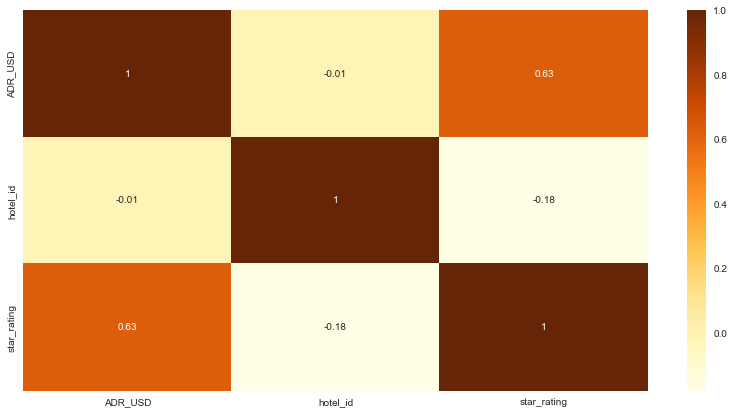

In [20]:
correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

### Feature Engineering

In [21]:
#create new columns

In [22]:
df1.columns

Index(['ADR_USD', 'hotel_id', 'star_rating', 'accommadation_type_name',
       'chain_hotel', 'booking_date', 'checkin_date', 'checkout_date'],
      dtype='object')

### Creating 3 new columns 
Time_left --> time left to checkin, this is calculated as booking date - the checkin date. If the time left is smaller the price increase will be high
Stay length --> the length of the stay calculated as checkin date - checkout date. If the stay is long then /room price might decrease since this can be counted as bulk booking and comparitively more discount will be offered.
rating_hotel --> this is combination of the type of the hotel and the rating of the hotel. From the above groupby data we can observe that the non-chain hotels have higher ADR hence combining it with the rating will give a good measure for price

In [23]:
df1['time_left'] = df1['booking_date'] - df1['checkin_date']

In [24]:
df1['stay_len'] = df1['checkin_date'] - df1['checkout_date']

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df1[['chain_hotel']]).toarray())

enc_data = enc_data.rename(columns={0: "chain", 1: "non_chain"})
df2 = df1.join(enc_data)

In [26]:
df2.head()

,ADR_USD,hotel_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,time_left,stay_len,chain,non_chain
0,71.06,297388,2.5,Hotel,non-chain,2016-02-08,2016-01-10,2016-02-10,29 days,-31 days,0.0,1.0
1,76.56,298322,3.0,Hotel,non-chain,2016-02-08,2016-01-10,2016-02-10,29 days,-31 days,0.0,1.0
2,153.88,2313076,5.0,Hotel,chain,2016-02-08,2016-01-10,2016-02-10,29 days,-31 days,1.0,0.0
3,126.60,2240838,3.5,Hotel,non-chain,2016-04-08,2016-02-10,2016-03-10,58 days,-29 days,0.0,1.0
4,115.08,2240838,3.5,Hotel,non-chain,2016-04-08,2016-02-10,2016-03-10,58 days,-29 days,0.0,1.0


In [27]:
df2.columns

Index(['ADR_USD', 'hotel_id', 'star_rating', 'accommadation_type_name',
       'chain_hotel', 'booking_date', 'checkin_date', 'checkout_date',
       'time_left', 'stay_len', 'chain', 'non_chain'],
      dtype='object')

In [28]:
df2['chain_rate'] = df2['chain']*df2['star_rating']
df2['non_chain_rate'] = df2['non_chain']*df2['star_rating']

In [29]:
df2.head()

,ADR_USD,hotel_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,time_left,stay_len,chain,non_chain,chain_rate,non_chain_rate
0,71.06,297388,2.5,Hotel,non-chain,2016-02-08,2016-01-10,2016-02-10,29 days,-31 days,0.0,1.0,0.0,2.5
1,76.56,298322,3.0,Hotel,non-chain,2016-02-08,2016-01-10,2016-02-10,29 days,-31 days,0.0,1.0,0.0,3.0
2,153.88,2313076,5.0,Hotel,chain,2016-02-08,2016-01-10,2016-02-10,29 days,-31 days,1.0,0.0,5.0,0.0
3,126.60,2240838,3.5,Hotel,non-chain,2016-04-08,2016-02-10,2016-03-10,58 days,-29 days,0.0,1.0,0.0,3.5
4,115.08,2240838,3.5,Hotel,non-chain,2016-04-08,2016-02-10,2016-03-10,58 days,-29 days,0.0,1.0,0.0,3.5


In [30]:
df2.drop(['chain','non_chain'], axis = 1, inplace = True)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   ADR_USD                  22366 non-null  float64        
 1   hotel_id                 22366 non-null  int64          
 2   star_rating              22366 non-null  float64        
 3   accommadation_type_name  22366 non-null  object         
 4   chain_hotel              22366 non-null  object         
 5   booking_date             22366 non-null  datetime64[ns] 
 6   checkin_date             22366 non-null  datetime64[ns] 
 7   checkout_date            22366 non-null  datetime64[ns] 
 8   time_left                22366 non-null  timedelta64[ns]
 9   stay_len                 22366 non-null  timedelta64[ns]
 10  chain_rate               22366 non-null  float64        
 11  non_chain_rate           22366 non-null  float64        
dtypes: datetime64[ns](

In [32]:
df2['time_left'] = df2['time_left']/pd.to_timedelta(1, unit='D')


In [33]:
df2['stay_len'] = df2['stay_len']/pd.to_timedelta(1, unit='m')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  22366 non-null  float64       
 1   hotel_id                 22366 non-null  int64         
 2   star_rating              22366 non-null  float64       
 3   accommadation_type_name  22366 non-null  object        
 4   chain_hotel              22366 non-null  object        
 5   booking_date             22366 non-null  datetime64[ns]
 6   checkin_date             22366 non-null  datetime64[ns]
 7   checkout_date            22366 non-null  datetime64[ns]
 8   time_left                22366 non-null  float64       
 9   stay_len                 22366 non-null  float64       
 10  chain_rate               22366 non-null  float64       
 11  non_chain_rate           22366 non-null  float64       
dtypes: datetime64[ns](3), float64(6)

Data analysis

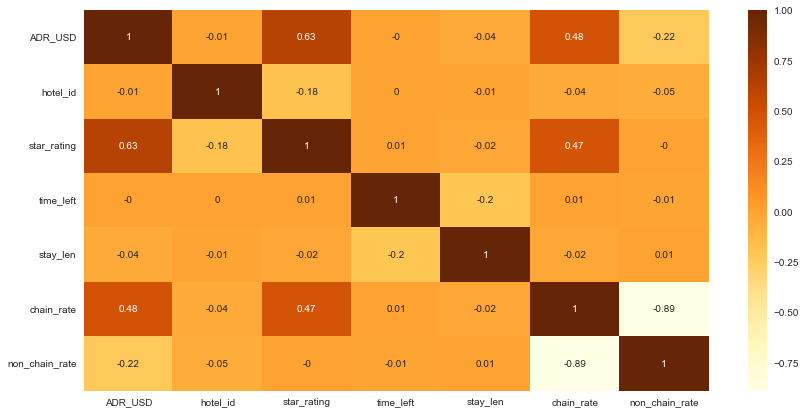

In [35]:
correlation = df2.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

### drop columns 
Since we have already accounted for checin checkout dates by the stay length and the time gap between booking date and the checkin date we can drop the columns

In [36]:
df2.drop(['booking_date', 'checkin_date', 'checkout_date'], axis = 1, inplace = True)

In [37]:
#histogram of numerical varibles 

In [38]:
df2.columns

Index(['ADR_USD', 'hotel_id', 'star_rating', 'accommadation_type_name',
       'chain_hotel', 'time_left', 'stay_len', 'chain_rate', 'non_chain_rate'],
      dtype='object')

In [ ]:
pip install -U seaborn

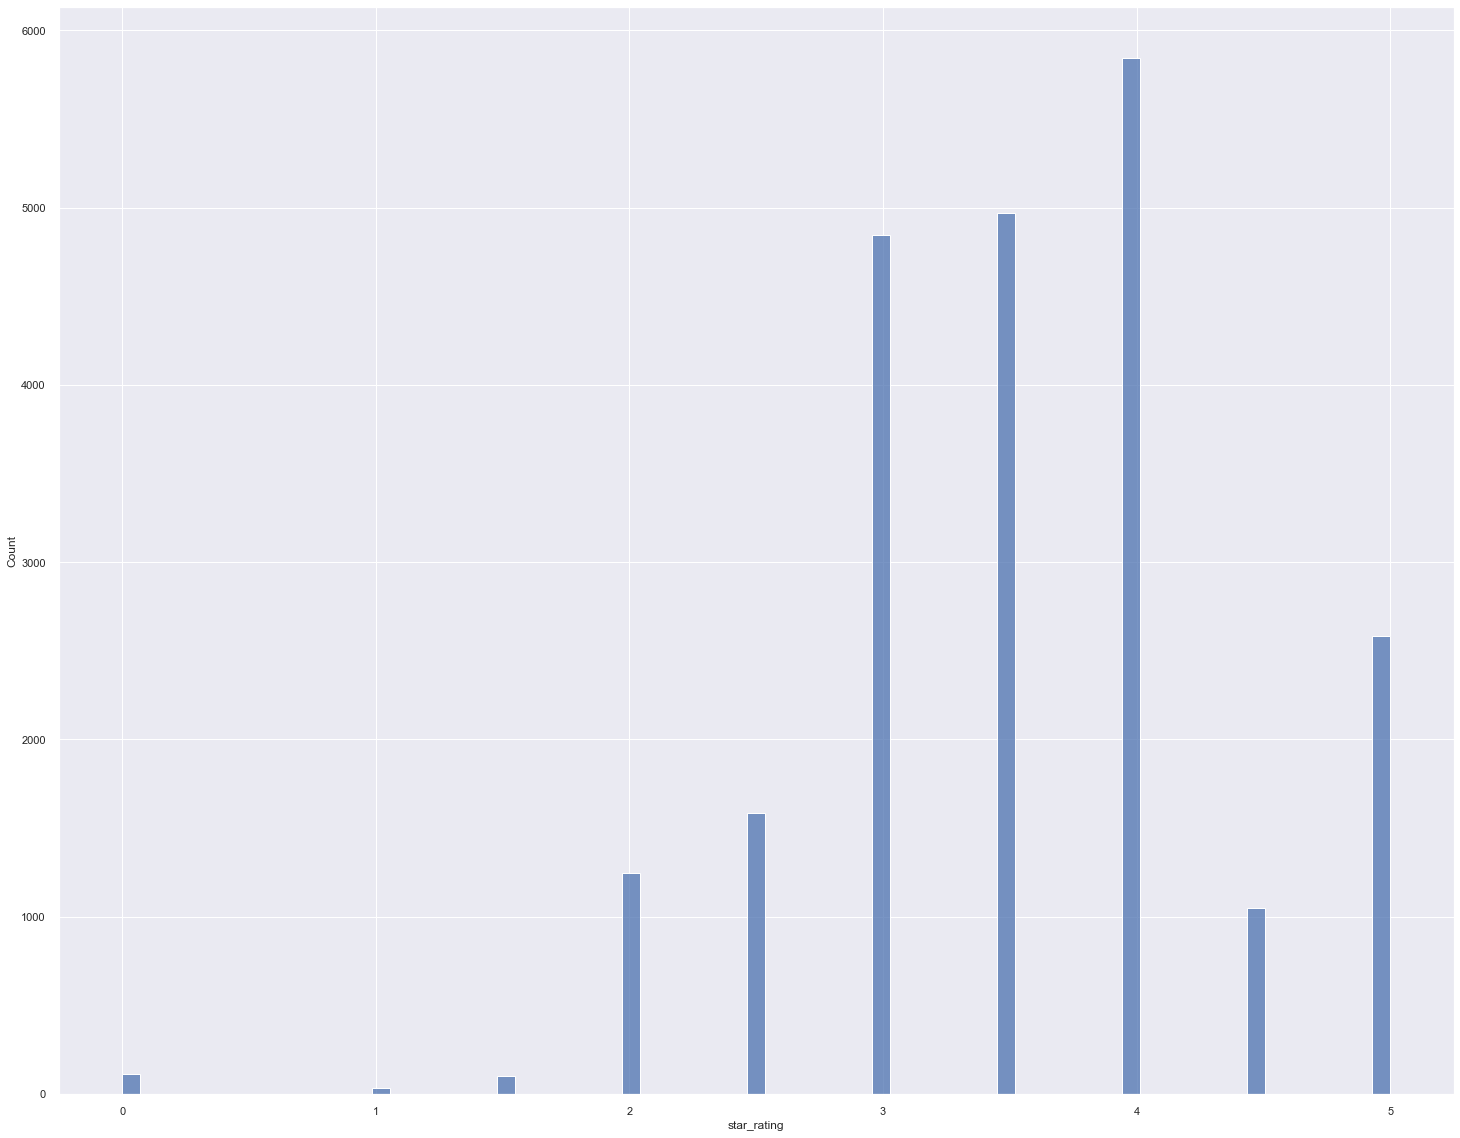

In [42]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(1,1,1)
sns.histplot(df['star_rating'], kde = False)


In [ ]:
#independant variables with dependant variables

In [92]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.countplot(x = 'star_rating', hue = 'ADR_USD', palette = 'Set2', data = df2)

plt.subplot(4,2,2)
sns.countplot(x = 'accommadation_type_name', hue = 'ADR_USD', palette = 'Set2', data = df2)

plt.subplot(4,2,3)
sns.countplot(x = 'chain_hotel', hue = 'ADR_USD', palette = 'Set2', data = df2)




KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000019DEF396B88> (for post_execute):


KeyboardInterrupt: 

# Model Building

In [43]:
#label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder_accommadation_type = LabelEncoder()
label_encoder_chain_hotel = LabelEncoder()
label_encoder_hotel_id = LabelEncoder()

df2['accommadation_type_name'] = label_encoder_accommadation_type.fit_transform(df2['accommadation_type_name'])
df2['chain_hotel'] = label_encoder_chain_hotel.fit_transform(df2['chain_hotel'])
df2['hotel_id'] = label_encoder_hotel_id.fit_transform(df2['hotel_id'])

In [44]:
df2.head()

,ADR_USD,hotel_id,star_rating,accommadation_type_name,chain_hotel,time_left,stay_len,chain_rate,non_chain_rate
0,71.06,35,2.5,3,1,29.0,-44640.0,0.0,2.5
1,76.56,36,3.0,3,1,29.0,-44640.0,0.0,3.0
2,153.88,176,5.0,3,0,29.0,-44640.0,5.0,0.0
3,126.60,171,3.5,3,1,58.0,-41760.0,0.0,3.5
4,115.08,171,3.5,3,1,58.0,-41760.0,0.0,3.5


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ADR_USD                  22366 non-null  float64
 1   hotel_id                 22366 non-null  int64  
 2   star_rating              22366 non-null  float64
 3   accommadation_type_name  22366 non-null  int32  
 4   chain_hotel              22366 non-null  int32  
 5   time_left                22366 non-null  float64
 6   stay_len                 22366 non-null  float64
 7   chain_rate               22366 non-null  float64
 8   non_chain_rate           22366 non-null  float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 1.4 MB


Creating test and train dataset

In [47]:
X = df2.drop('ADR_USD', axis = 1)
X = X.values
y = df2['ADR_USD']

In [53]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
Note: you may need to restart the kernel to use updated packages.


Balancing Classes As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

Standard scaler/normalizing

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

# ADA Boost regressor

In [93]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
 
#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
 
#Printing all the parameters of Adaboost
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=1)


In [95]:
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
 

#Measuring accuracy on Testing Data
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  32.168


# Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y)  

RandomForestRegressor(random_state=0)

In [66]:
y_pred = regressor.predict(X_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  83.506


feature importance

In [71]:
feature_imp_random = pd.Series(regressor.feature_importances_,index=list(df2.drop('ADR_USD', axis = 1).columns)).sort_values(ascending = False)
feature_imp_random

star_rating                0.452200
hotel_id                   0.205541
time_left                  0.133836
chain_rate                 0.104427
stay_len                   0.050388
non_chain_rate             0.031316
accommadation_type_name    0.020418
chain_hotel                0.001874
dtype: float64

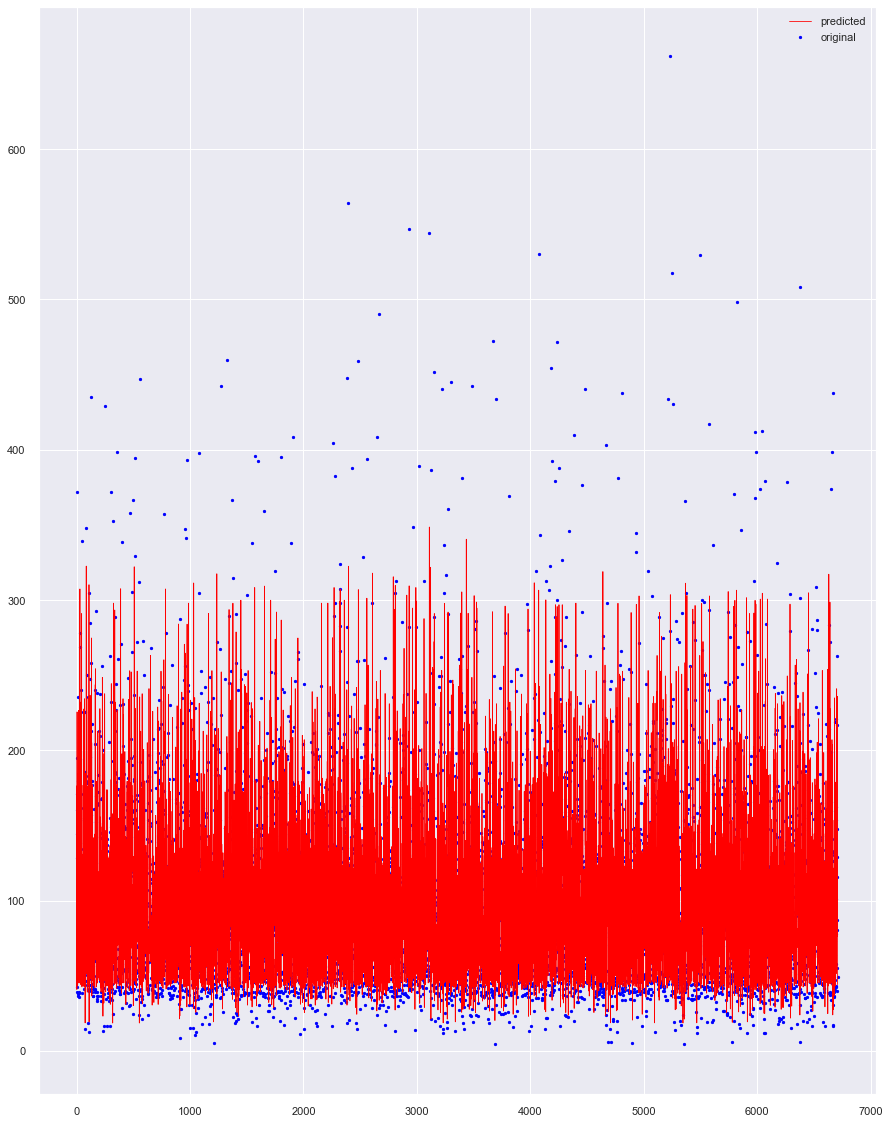

In [91]:
plt.figure(figsize = (15, 20))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# XG Boost

In [78]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV
regressor=xg.XGBRegressor(eval_metric='rmsle')
# set up our search grid
param_grid = {"max_depth":    [4],
              "n_estimators": [100, 200],
              "learning_rate": [0.1, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [80]:
from sklearn.metrics import mean_squared_error as MSE
regressor=xg.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
y_pred = regressor.predict(X_test)
RMSLE = np.sqrt( MSE(y_test, y_pred) )
print("The score is %.5f" % RMSLE )

The score is 32.16792


In [87]:
feature_imp_random = pd.Series(regressor.feature_importances_,index=list(df2.drop('ADR_USD', axis = 1).columns)).sort_values(ascending = False)
feature_imp_random

star_rating                0.508673
chain_rate                 0.282204
non_chain_rate             0.073462
chain_hotel                0.049464
hotel_id                   0.045650
accommadation_type_name    0.026128
time_left                  0.008120
stay_len                   0.006299
dtype: float32

# Conclusion

For feature selection both random forest and XG boost gives the maximum importance to the featuer star_raing followed by chain_rate, hotel_id and time left till the date of the checkin
I have tested 3 different regression models and of all the models, Random forest gives the highest RSME whereas the XG boost and ADA boost gave relatively comparable and lower RSME